In [1]:
import os
from array import array
import numpy as np
from commpy.filters import rcosfilter
from commpy.filters import rrcosfilter
import matplotlib
import matplotlib.pyplot as plt
import ipympl
#%matplotlib inline
%matplotlib widget

In [2]:
def calculate_spectrum(signal):
    yf = np.fft.fft(signal)
    yf = np.abs(yf.reshape((len(yf), 1))) / len(signal)
    return yf


def plot_spectrum(signal, figure_counter, title="Amplitude spectrum"):
    spectrum = np.roll(calculate_spectrum(signal), len(signal) // 2)
    yf = 20 * np.log10(spectrum)

    plt.figure(figure_counter)
    plt.cla()
    x_data = np.arange(-len(spectrum) // 2 + 1, len(spectrum) // 2 + 1)
    x_data = x_data / (len(spectrum) / 2)
    plt.plot(x_data, yf)
    plt.grid(1)
    plt.xlabel('Frequency (semicircles)')
    plt.ylabel('Magnitude (dB)')
    plt.title(title)
    plt.show()
    return yf

def plot_signal_power(signal, figure_counter, title="Signal Power"):
    plt.figure(figure_counter)
    plt.cla()
    x_data = np.arange(0, len(signal))
    plt.plot(x_data, signal)
    plt.grid(1)
    plt.xlabel('time (samples)')
    plt.ylabel('Signal Power')
    plt.title(title)
    plt.show()


def add_freq(sig, f0_to_fsig):
    n = np.arange(0, len(sig), 1)
    mixer = np.exp(1j * np.pi * f0_to_fsig * n)
    print(mixer[(821500 - 10 -1) : (821500 - 1)])
    return sig * mixer

In [3]:
def read_signal(file_name, data_type, int_num_to_read = 0):
    file_stats = os.stat(file_name)
    file_size = file_stats.st_size
    iq_size_in_bytes = 0
    if data_type == 'H':
        iq_size_in_bytes = 4
    if data_type == 'f':
        iq_size_in_bytes = 8
    if int_num_to_read == 0:
        int_num_to_read = file_size // iq_size_in_bytes * 2
    else:
        int_num_to_read += (int_num_to_read % 2)
    print(int_num_to_read)     
    arr = array(data_type)
    with open(file_name, 'rb') as fileobj:
        arr.fromfile(fileobj, int_num_to_read)
        dd = struct.unpack('>f', arr)[0]
    i = np.array(arr[:: 2])
    i = i.reshape((len(i), 1))
    q = np.array(arr[1:: 2])
    q = q.reshape((len(q), 1))
    print(i[:10])
    sig = np.empty((len(i), 1), complex)
    sig.real = i
    sig.imag = q
    sig_flatten = sig.flatten()
    return sig_flatten

In [4]:
#read_signal("/home/xy/projects/cpp/int2float/cmake-build-debug-gcc_13/float_mxdma_hrc.pcm", 'H', 6)

In [5]:
file_path = "/home/xy/projects/cuda/GPU_Overlap-and-save_convolution/GPU_OLS_C2C_sharedmemory/out.dat" #"/home/xy/Signals/MxDMA/HRC/sig_1264460229_16437329_2024-06-14_14-48-43.pcm"
data_type = 'f'
figure_counter = 0
start_pos = 0 # 75177 # [IQ-samples]
used_len = 16430 #16437329 # [IQ-samples]
iq_parts = (start_pos + used_len) * 2
#source_signal_full = read_signal(file_path, data_type, iq_parts)
#print(len(source_signal_full))

In [6]:
#plot_signal_power(source_signal_full, 2)
#plot_spectrum(source_signal_full, 1)

In [7]:
import numpy as np
import struct
import os
def read_by_unpack(file_name, data_num=0):
    # Load test data
    
    f = open(file_name,'rb')
    file_stats = os.stat(file_name)
    file_size = file_stats.st_size
    print(file_size)
    if data_num == 0:
        data_num = int(file_size / 4);
    print("data num ")
    print(data_num)
    #  102500 is the number of numbers contained in the document, and a floating point number occupies 4 bytes
    arr = f.read(data_num * 4)
    data_raw = struct.unpack('f'*data_num, arr)
    f.close()
    return data_raw
    
import numpy as np

def read_float_by_unpack_delimeter(file_name, data_num=0):
    # Load test data
    
    #f = open(file_name,'rb')
    file_stats = os.stat(file_name)
    file_size = file_stats.st_size
    #print(file_size)
    if data_num == 0:
        data_num = int(file_size / 4);


    # Open the binary file using a file object
    with open(file_name, 'rb') as file:
    # Read the binary data and convert it to a NumPy array
        data = np.fromfile(file, dtype=np.float32, sep='\n')

    #with open(file_name, 'rb') as f:
     #   for line in f.readlines():
            # Each line represents a binary float, strip the newline and unpack
      #      number = struct.unpack('f', line.strip())[0]
       #     data_raw[i] = number
    
    #print("data num ")
    #print(data_num)
    #  102500 is the number of numbers contained in the document, and a floating point number occupies 4 bytes
    #arr = f.read(data_num * 4)
    #data_raw = struct.unpack('f'*data_num, arr)
    
    return data
    
def make_cmplx_sig(iq_data):
    i = np.array(iq_data[:: 2])
    i = i.reshape((len(i), 1))
    q = np.array(iq_data[1:: 2])
    q = q.reshape((len(q), 1))
    print(i[:10])
    sig = np.empty((len(i), 1), complex)
    sig.real = i
    sig.imag = q
    sig_flatten = sig.flatten()
    return sig_flatten


In [8]:
file_rrc_filt = '/home/xy/projects/cuda/GPU_Overlap-and-save_convolution/GPU_OLS_C2C_sharedmemory/mxdma_mixed_sig.dat'
file_rrc_filt = '/home/xy/projects/cuda/GPU_Overlap-and-save_convolution/GPU_OLS_C2C_sharedmemory/filter_rrc.dat'
file_rrc_filt = '/home/xy/projects/cuda/GPU_Overlap-and-save_convolution/GPU_OLS_C2C_sharedmemory/rrc_filtered.dat'
#file_rrc_filt = '/home/xy/projects/cuda/GPU_Overlap-and-save_convolution/GPU_OLS_C2C_sharedmemory/h_filter.dat'
#file_rrc_filt = '/home/xy/projects/cuda/GPU_Overlap-and-save_convolution/GPU_OLS_C2C_sharedmemory/h_input_signal.dat'

filt_sig = read_float_by_unpack_delimeter(file_rrc_filt)
print(len(filt_sig))
shift = 10000
start = 0#(len(filt_sig) - 100 - shift)
end   = 100#len(filt_sig) - shift
#print(filt_sig[start : end])
cmplx_sig = make_cmplx_sig(filt_sig)
print(cmplx_sig[:30])
print(len(cmplx_sig))

3277568
[[-141.609 ]
 [ -53.6684]
 [  43.2576]
 [ 119.913 ]
 [ 159.73  ]
 [ 143.818 ]
 [  53.8906]
 [-107.646 ]
 [-306.75  ]
 [-508.098 ]]
[-1.41608994e+02 -633.58099365j -5.36683998e+01 -379.80300903j
  4.32575989e+01  -81.84809875j  1.19913002e+02 +254.24699402j
  1.59729996e+02 +621.98400879j  1.43817993e+02 +986.20098877j
  5.38905983e+01+1306.79003906j -1.07646004e+02+1556.38000488j
 -3.06750000e+02+1702.80004883j -5.08097992e+02+1723.98999023j
 -6.75432983e+02+1609.88000488j -7.79395020e+02+1364.67004395j
 -7.97909973e+02+1022.23999023j -7.09857971e+02 +621.37597656j
 -5.24450989e+02 +215.20799255j -2.71660004e+02 -134.80700684j
  1.00908995e+00 -372.72000122j  2.42893005e+02 -466.66699219j
  4.06295013e+02 -410.47900391j  4.55028015e+02 -229.53799438j
  3.80341003e+02  +30.66469955j  1.86697006e+02 +315.96798706j
 -9.91908035e+01 +571.35101318j -4.34641998e+02 +742.07299805j
 -7.62221008e+02 +795.17700195j -1.03059998e+03 +723.83197021j
 -1.19304004e+03 +540.5j        -1.2215400

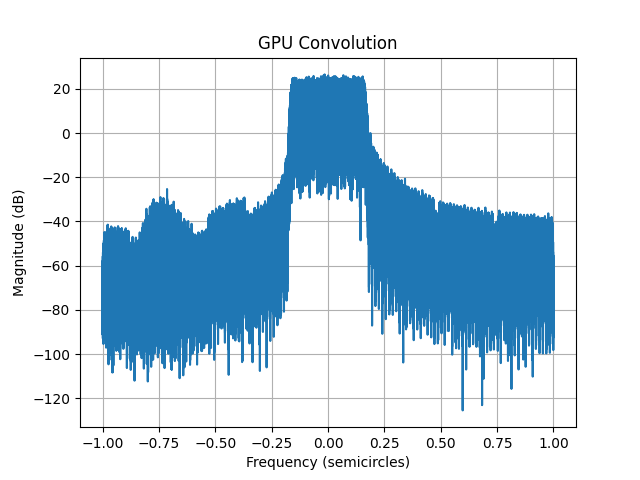

array([[-73.93988443],
       [-72.6211873 ],
       [-73.00650681],
       ...,
       [-72.7916756 ],
       [-73.10789658],
       [-75.90396254]])

In [9]:
plot_spectrum(cmplx_sig, 2, title="GPU Convolution")

In [10]:
import gc

#del data_raw
#del arr
#gc.collect()